Training Data Size:  torch.Size([60000, 28, 28]) - torch.Size([60000])
Testing Data Size:  torch.Size([10000, 28, 28]) - torch.Size([10000])


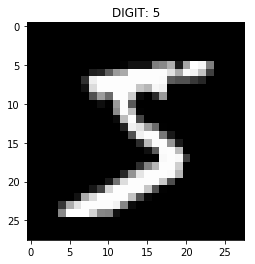

In [21]:
import os
from torchvision import datasets
import torch
import matplotlib.pyplot as plt
import numpy as np
from torch.autograd import Variable
# Change this to where you want to save the data
SAVE_DIR = os.path.expanduser(os.getcwd()+'/data/MNIST/')
# train data
mnist_train = datasets.MNIST(SAVE_DIR, train=True, download=True)
x_train_mnist, y_train_mnist = mnist_train.train_data.type(th.FloatTensor), mnist_train.train_labels
# test data
mnist_test = datasets.MNIST(SAVE_DIR, train=False, download=True)
x_test_mnist, y_test_mnist = mnist_test.test_data.type(th.FloatTensor), mnist_test.test_labels

train = torch.utils.data.TensorDataset(x_train_mnist.view(-1, 28, 28, 1).permute(0, 3, 1, 2), y_train_mnist.view(-1, 1))
train_loader = torch.utils.data.DataLoader(train, batch_size=64, shuffle=False)

test = torch.utils.data.TensorDataset(x_test_mnist.view(-1, 28, 28, 1).permute(0, 3, 1, 2), y_test_mnist.view(-1, 1))
test_loader = torch.utils.data.DataLoader(test, batch_size=64, shuffle=False)

print('Training Data Size: ' ,x_train_mnist.size(), '-', y_train_mnist.size())
print('Testing Data Size: ' ,x_test_mnist.size(), '-', y_test_mnist.size())

plt.imshow(x_train_mnist[0].numpy(), cmap='gray')
plt.title('DIGIT: %i' % y_train_mnist[0])
plt.show()

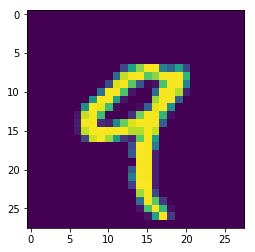

In [7]:
index = 4
x_example = x_train_mnist[index]
plt.imshow(x_example)
plt.show()

In [8]:
import torch.nn.functional as F
# rotation = torch.Tensor([[1/1.0,0],[0, 1/1.0]])
rotation = rot
translation = torch.Tensor([0, 0])
theta = torch.Tensor([[0, 0, 0],[0, 0, 0]])
theta[:2, :2] = rotation
print(theta[:, 2])
theta[:, 2] = translation
theta = theta.view(1, 2, 3)
print(theta)
x_batch = x_example.view(1, 1, 28, 28)
x_flat = x_example.view(1, 28 * 28)
grid = F.affine_grid(theta, x_batch.size())
x = F.grid_sample(x_batch, grid)
plt.imshow(x[0][0])

u, s, v = torch.svd(x[0][0])

NameError: name 'rot' is not defined

LOOP NUM 0
1234
U first vec: tensor([-0.3500,  0.9368], grad_fn=<SelectBackward>)
U: tensor([[-0.3500,  0.9368],
        [ 0.9368,  0.3500]], grad_fn=<SvdBackward>)
MEAN X: tensor(28.1807, grad_fn=<DivBackward1>)
MEAN Y: tensor(16.1383, grad_fn=<AddBackward>)
X DIFF: tensor(-0.4090, grad_fn=<DivBackward0>)
Y DIFF: tensor(0.1931, grad_fn=<DivBackward0>)
THETA: tensor([[[ 0.9368,  0.3500,  0.4090],
         [-0.3500,  0.9368, -0.1931]]], grad_fn=<CopySlices>)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:65: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number


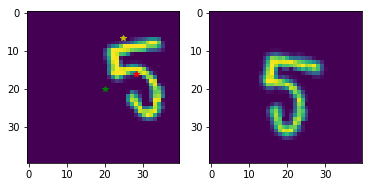

In [197]:
def img_to_coord_tensor(img, img_num, tensor_index):
    """
    Takes in a 4D image and returns the 3*W*H coordinate representation
    """
    _, _, height, width = img.shape
    flattened_img = torch.transpose(img[img_num, tensor_index], 0, 1).contiguous().view(width * height)
    x_coord = torch.arange(0, width).view(width, 1)
    x_coord = x_coord.expand(width, height).contiguous()
    x_coord = x_coord.view(width * height).float()

    y_coord = torch.arange(height, 0, -1)
    y_coord = y_coord.expand(width, height).contiguous()
    y_coord = y_coord.view(width * height).float()

    new_coord_matrix = np.vstack([x_coord.numpy(), y_coord.numpy()])
    img_tensor = torch.stack((x_coord, y_coord, flattened_img))

    return img_tensor

def weighted_pca(coord_mat):
    """
    Given three real-valued vectors of same length, corresponding to the coordinates
    and weight of a 2-dimensional dataset, this function outputs the angle in radians
    of the line that aligns with the (weighted) average and main linear component of
    the data. For that, first a weighted mean and covariance matrix are computed.
    Then u,e,v=svd(cov) is performed, and u * f(x)=0 is solved.
    """
    x_vec = coord_mat[0, :]
    y_vec = coord_mat[1, :]
    weights = coord_mat[2, :]
    weight_mat = torch.diag(weights)
    weights_sum = weights.sum()
    # Subtract (weighted) mean and compute (weighted) covariance matrix:
    eps = 0.0001
    weights_sum += eps
    mean_x, mean_y = torch.dot(weights, x_vec) / weights_sum, torch.dot(weights, y_vec) / weights_sum
    coord_mat[0, :] -= mean_x
    coord_mat[1, :] -= mean_y
    centered_mat = coord_mat[[0, 1], :]
    weighted_cov = torch.mm(centered_mat, torch.mm(weight_mat, torch.t(centered_mat) )) / weights_sum
    u,e,v = torch.svd(weighted_cov)
    eig_val = torch.sqrt(e)
    rotation = rot_mat(pi).float()
    print("U first vec:", u[:, 0])
    if u[1,0] < 0:
        u = torch.matmul(rotation, u)
#         pass
#         eig_val[0] = -1
#     else:
#         eig_val[0] = 1
    print("U:", u)
    scale_mat = torch.Tensor([[eig_val[0], 0], 
                              [0, eig_val[1]]])
#     rotation_mat = torch.stack([eig_val[0]**(-1)*u[:,0], eig_val[1]**(-1)*u[:,1]])
#     rotation_mat = torch.t(rotation_mat)
    return u, scale_mat, mean_x, mean_y


compress = KernelCompress(3)
target_val = 3
img_shape = (40, 40)
for y in range(1):
    print("LOOP NUM", y)
    index = np.random.randint(2000)
    while y_train_mnist[index][0].numpy() != target_val:
        index = np.random.randint(2000)
#     index = 80
    print(index)
#     x_example1 = x_train_mnist[index]
#     x_example1 = x_train_mnist[index]
    x_example = torch_train_images[index]
    x_batch = x_example.view(1, 1, img_shape[0], img_shape[1])
    padding = torch.zeros(1, 2, img_shape[0], img_shape[1])
    x_batch = torch.cat((x_batch, padding), 1)
    x_batch = compress(x_batch)
#     print("XBATCH TYPE", type(x_batch))
#     print("XBATCH SHAPE:", x_batch.shape)
    
    num_channels = x_batch.shape[0]
    theta = torch.zeros(num_channels, 2, 3)
    pi = 3.1415926535
    
    for channel_num in range(num_channels):
        x_batch_coord = img_to_coord_tensor(x_batch, channel_num, 0)
        

        rot, scale, mean_x, mean_y = weighted_pca(x_batch_coord)
#         print(rot[0][1], rot[0][0])
        rot_lambda = torch.atan2(rot[0][1], rot[0][0])
#         print("LAMBDA:", np.degrees(rot_lambda))
        diff_angle = ((pi / 2) - rot_lambda)
#         print("DIFF LAMBDA:", np.degrees(diff_angle))


        rotation = rot_mat(diff_angle).float()

        theta[channel_num, :2, :2] = rotation
        theta[channel_num, 0, 2] = (img_shape[0]/2 - mean_x)/ (img_shape[0]/2)
        theta[channel_num, 1, 2] = (img_shape[1]/2 - mean_y)/ (img_shape[1]/2)
        print("MEAN X:", mean_x)
        print("MEAN Y:", img_shape[1] - mean_y)
        print("X DIFF:", (img_shape[0]/2 - mean_x)/ (img_shape[0]/2))
        print("Y DIFF:", (img_shape[1]/2 - (img_shape[1] - mean_y)) / (img_shape[1]/2))
        theta[channel_num, 0, 2] = -1*(img_shape[0]/2 - mean_x)/ (img_shape[0]/2)
        theta[channel_num, 1, 2] = -1*(img_shape[1]/2 - (img_shape[1] - mean_y)) / (img_shape[1]/2)
        print("THETA:", theta)

    fig, ax = plt.subplots(1, 2)
    
#     print("THETA SHAPE:", theta.shape)

    grid = F.affine_grid(theta, x_batch.size())
    x = F.grid_sample(x_batch, grid)
    x = x.view(1, img_shape[0], img_shape[1])
    x = x.permute(1, 2, 0)
#     print("Results Shape:", x[0].shape)
 
    x_batch = x_batch.view(1, img_shape[0], img_shape[1])
    x_batch = x_batch.permute(1, 2, 0)
    ax[0].imshow(x_batch[:, :, 0].data)
    ax[1].imshow(x[:,:,0].data)
#     ax[2].imshow(x[:,:,0].data)
    ax[0].plot(mean_x.data, x.data[0].shape[0] - mean_y.data, 'r*')
    ax[0].plot(mean_x.data+rot[0][0].data*10, x.data[0].shape[0] - (mean_y.data+rot.data[0][1]*10), 'y*')
    ax[0].plot(img_shape[0]/2, img_shape[1]/2, 'g*')

In [198]:
class KernelCompress(torch.nn.Module):
    def __init__(self, in_channels):
        super(KernelCompress, self).__init__()
        self.conv2d = torch.nn.Conv2d(in_channels, 1, 1)   # hidden layer
        self.conv2d.weight = torch.nn.Parameter(torch.ones(1,in_channels,1,1))
        self.conv2d.bias = torch.nn.Parameter(torch.zeros(1))

    def forward(self, x):
        x = self.conv2d(x)
        return x

def rot_mat(theta):
    theta = torch.Tensor([theta])
    c, s = torch.cos(theta), torch.sin(theta)
    R = torch.Tensor(((c,-s), (s, c)))
    return R


class ShapeWhitening(torch.nn.Module):
    """
    PyTorch layer for applying shape whitening decomposition
    """
    
    def __init__(self):
        super(ShapeWhitening, self).__init__()
    
    def weighted_pca(self, coord_mat):
        """
        Given three real-valued vectors of same length, corresponding to the coordinates
        and weight of a 2-dimensional dataset, this function outputs the angle in radians
        of the line that aligns with the (weighted) average and main linear component of
        the data. For that, first a weighted mean and covariance matrix are computed.
        Then u,e,v=svd(cov) is performed, and u * f(x)=0 is solved.
        """
        col_nums = coord_mat.shape[1]
        
        x_vec = coord_mat[0, :]
        y_vec = coord_mat[1, :]
        weights = coord_mat[2, :]
        weight_mat = torch.diag(weights)
        weights_sum = weights.sum()
        # Subtract (weighted) mean and compute (weighted) covariance matrix:
        eps = 0.0001
        weights_sum = weights_sum + eps
        mean_x, mean_y = torch.dot(weights, x_vec) / weights_sum, torch.dot(weights, y_vec) / weights_sum
        
        mean_mat = torch.stack((mean_x*torch.ones(col_nums), mean_y*torch.ones(col_nums), torch.zeros(col_nums)))
        coord_mat = coord_mat - mean_mat
        centered_mat = coord_mat[[0, 1], :]
        weighted_cov = torch.mm(centered_mat, torch.mm(weight_mat, torch.t(centered_mat) )) / weights_sum
        u, e, v = torch.svd(weighted_cov)
        eig_val = torch.sqrt(e)
        rotation = rot_mat(pi).float()
 
        if u[1,0] < 0:
            u = torch.matmul(rotation, u)

        scale_mat = torch.Tensor([[eig_val[0], 0], 
                                  [0, eig_val[1]]])
        return u, scale_mat, mean_x, mean_y
    
    def img_to_coord_tensor(self, img, img_num, kernel_num):
        """
        Takes in a 4D image and returns the 3*W*H coordinate representation
        """
        _, _, height, width = img.shape
        flattened_img = torch.transpose(img[img_num, kernel_num], 0, 1).contiguous().view(width * height)
        x_coord = torch.arange(0, width).view(width, 1)
        x_coord = x_coord.expand(width, height).contiguous()
        x_coord = x_coord.view(width * height).float()

        y_coord = torch.arange(height, 0, -1)
        y_coord = y_coord.expand(width, height).contiguous()
        y_coord = y_coord.view(width * height).float()

        new_coord_matrix = np.vstack([x_coord.numpy(), y_coord.numpy()])
        coord_matrix = torch.stack((x_coord, y_coord, flattened_img))

        return coord_matrix

    def forward(self, img_tensor):
        img_num, channel_num, new_height, new_width = img_tensor.shape
        theta = torch.zeros(img_num, 2, 3)
        rotations = torch.ones(img_num, 1)
        Id_mat = torch.eye(img_num)
        
        pi = 3.141592653589793238462643383279
        compress = KernelCompress(channel_num)
        img_squashed = compress(img_tensor)

        for img_index in range(img_num):
            img_squashed_coord = self.img_to_coord_tensor(img_squashed, img_index, 0)

            rot, scale, mean_x, mean_y = self.weighted_pca(img_squashed_coord)
            rot_lambda = torch.atan2(rot[0][1], rot[0][0])
            diff_angle = ((pi / 2) - rot_lambda)

            rotation = rot_mat(diff_angle).float()
            theta[img_index, :2, :2] = rotation
            theta[img_index, 0, 2] = -1*(new_width / 2 - mean_x)/ (new_width / 2)
            theta[img_index, 1, 2] = -1*(new_height / 2 - (new_height - mean_y)) / (new_height / 2)
            rotations = rotations + Id_mat[img_index, :].view(img_num, 1)*diff_angle


        grid = F.affine_grid(theta, img_tensor.size())
        img_tensor = F.grid_sample(img_tensor, grid)
        return img_tensor, (rot, scale, mean_x, mean_y), rotations

1418
584
86
398
366
770
1217
981
1644
1331


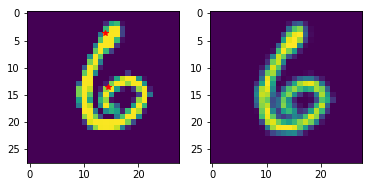

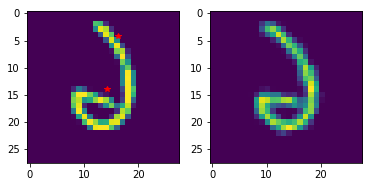

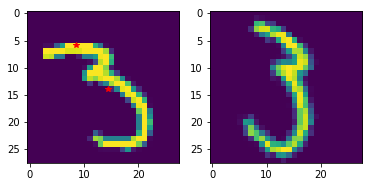

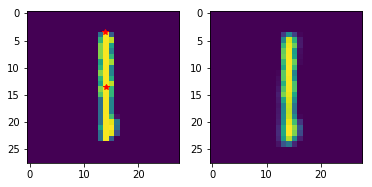

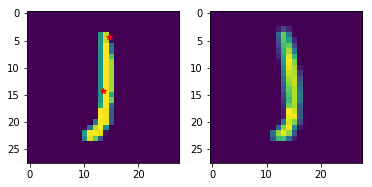

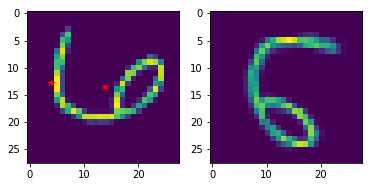

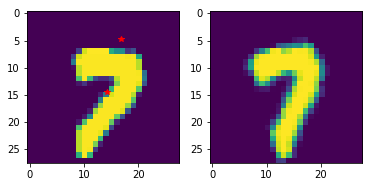

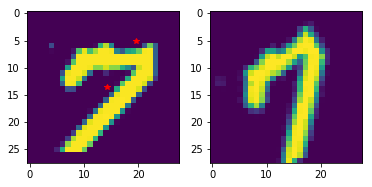

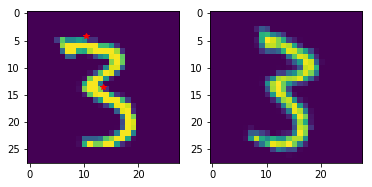

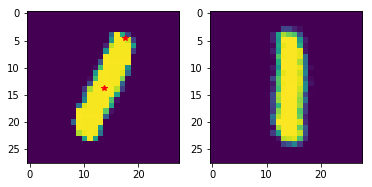

In [199]:
shape_whitening = ShapeWhitening()

# print(index)

def plot_transform(py_tensor, ax1=None, ax2=None, img_shape=(1, 40, 40)):
#     py_tensor = py_tensor.clone()
#     py_tensor = py_tensor.view(28, 28)
    ax = None
    if ax1 is None:
        fig, ax = plt.subplots(1, 2)
        ax1 = ax[0]
        ax2 = ax[1]
    x_batch = py_tensor
#     print(x_batch.shape)
    x_batch_transform, (rot, scale, mean_x, mean_y), rotations = shape_whitening(x_batch)
#     print(rotations)
#     print(rot, scale, mean_x, mean_y)

    x_batch_transform_numpy = x_batch_transform.view(*img_shape).data
    x_batch_transform_numpy = x_batch_transform_numpy.permute(1, 2, 0)
    x_batch_transform_numpy = x_batch_transform_numpy.numpy()

    x_batch_numpy = x_batch.view(*img_shape).data
    x_batch_numpy = x_batch_numpy.permute(1, 2, 0)
    x_batch_numpy = x_batch_numpy.numpy()

    
    ax1.imshow(x_batch_numpy[:, :, 0])
    ax1.plot(mean_x.data, img_shape[1] - mean_y.data, 'r*')
    ax1.plot(mean_x.data+rot[0][0].data*10, img_shape[1] - (mean_y.data+rot.data[0][1]*10), 'r*')
    
    ax2.imshow(x_batch_transform_numpy[:, :, 0])
    
    if ax is None:
        return ax

# plot_transform(x_example.view(1,1,28,28))
for x in range(10):
    index = np.random.randint(2000)
    print(index)
    x_example = x_train_mnist[index]
    plot_transform(x_example.view(1,1,28,28), img_shape=(1, 28, 28))
# fig, ax = plt.subplots(1)
# ax.imshow(test_img.view(28,28))

In [294]:
import torch.nn as nn
img_shape = (40, 40)
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=5, padding=2),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.MaxPool2d(2))
        self.layer2 = nn.Sequential(
            nn.Conv2d(16, 32, kernel_size=5, padding=2),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(2))
        self.fc = nn.Linear(int(img_shape[1]/4)*int(img_shape[0]/4)*32, 10)
        
    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.view(out.size(0), -1)
        out = self.fc(out)
        return out
        
class SWCNN(nn.Module):
    def __init__(self):
        super(SWCNN, self).__init__()
        self.shape_whitening = ShapeWhitening()
        self.layer1 = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=5, padding=2),
            nn.BatchNorm2d(16),
            nn.ReLU())
        self.pool = nn.MaxPool2d(2)
        self.layer2 = nn.Sequential(
            nn.Conv2d(16, 32, kernel_size=5, padding=2),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(2))
        self.fc = nn.Linear(int(img_shape[1]/4)*int(img_shape[0]/4)*32, 10)
        self.fc2 = nn.Linear(11, 10)
        
    def forward(self, x):
        
        out = self.layer1(x)
        out, _, rot = self.shape_whitening(out)
        out = self.pool(out)
        out = self.layer2(out)
        out = out.view(out.size(0), -1)
        out = self.fc(out)
#         print("TENSOR SHAPES:", out.shape)
#         print(rot.shape)
#         out = torch.cat((out, rot), 1)
#         out = self.fc2(out)

        return out

In [395]:
def train_net(model, data_loader, loss_function, optimizer_function, num_epochs=10, num_examples = 10):
    # Train the Model
    for epoch in range(num_epochs):
        for i, batch in enumerate(data_loader):
            if i >= num_examples:
                print("Batch Num", i*epoch)
                print("LOSS:", loss)
                break
            input_data = Variable(batch[0].float()/batch[0].max())
            temp_labels = Variable(batch[1].long().squeeze(1))
            # Forward + Backward + Optimize
            optimizer_function.zero_grad()
            outputs = model(input_data)

            loss = loss_function(outputs, temp_labels)
            loss.backward()
            optimizer_function.step()
    
    return model

In [403]:
cnn = CNN()
swcnn = SWCNN()
learning_rate = 0.001
# Loss and Optimizer
criterion = nn.CrossEntropyLoss()
criterion2 = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(cnn.parameters(), lr=learning_rate)
optimizer2 = torch.optim.Adam(swcnn.parameters(), lr=learning_rate)

In [404]:
train_net(cnn, train_loader, criterion, optimizer, 20, 20)
print("DONE TRAINING CNN")
train_net(swcnn, train_loader, criterion2, optimizer2, 20, 20)
print("DONE TRAINING SWCNN")

Batch Num 0
LOSS: tensor(2.1032, grad_fn=<NllLossBackward>)
Batch Num 20
LOSS: tensor(1.7270, grad_fn=<NllLossBackward>)
Batch Num 40
LOSS: tensor(1.3539, grad_fn=<NllLossBackward>)
Batch Num 60
LOSS: tensor(1.1158, grad_fn=<NllLossBackward>)
Batch Num 80
LOSS: tensor(0.9084, grad_fn=<NllLossBackward>)
Batch Num 100
LOSS: tensor(0.7033, grad_fn=<NllLossBackward>)
Batch Num 120
LOSS: tensor(0.5296, grad_fn=<NllLossBackward>)
Batch Num 140
LOSS: tensor(0.4067, grad_fn=<NllLossBackward>)
Batch Num 160
LOSS: tensor(0.3371, grad_fn=<NllLossBackward>)
Batch Num 180
LOSS: tensor(0.2478, grad_fn=<NllLossBackward>)
Batch Num 200
LOSS: tensor(0.1905, grad_fn=<NllLossBackward>)
Batch Num 220
LOSS: tensor(0.1379, grad_fn=<NllLossBackward>)
Batch Num 240
LOSS: tensor(0.1181, grad_fn=<NllLossBackward>)
Batch Num 260
LOSS: tensor(0.0991, grad_fn=<NllLossBackward>)
Batch Num 280
LOSS: tensor(0.0733, grad_fn=<NllLossBackward>)
Batch Num 300
LOSS: tensor(0.0752, grad_fn=<NllLossBackward>)
Batch Num 320


LABEL CNN ROTATION


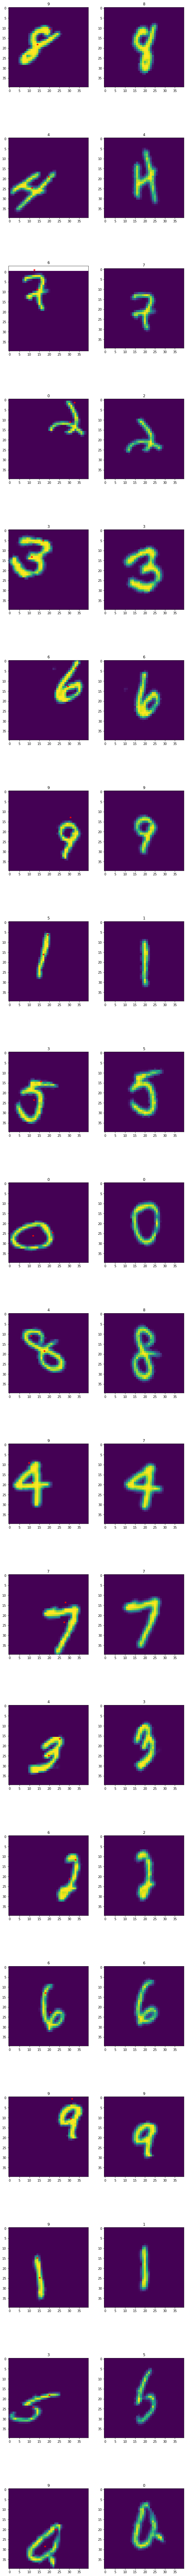

In [405]:
num_limit = 1
total_num = 20
fig, ax = plt.subplots(total_num, 2, figsize=(10,150))
count = 0
specific_batch = np.random.randint(50)

shape_whitening = ShapeWhitening()

print("LABEL", "CNN", "ROTATION")
for index, batch in enumerate(test_loader):
    if index != specific_batch:
        continue
    for index2, (img, label) in enumerate(zip(batch[0],batch[1])):
        if index2 >= total_num:
            break
        img2 = img.clone()
        img = img.view(1, 1,img_shape[1],img_shape[0])
        test_img = Variable(img.float()/img.max())
        test_img2 = Variable(img2.view(1, 1,img_shape[1],img_shape[0]).float()/img2.max())
        
        outputs = cnn(test_img.clone())
        _, prediction = torch.max(outputs.data, 1)
        
        outputs2 = swcnn(test_img.clone())
        _, prediction2 = torch.max(outputs2.data, 1)
    
        
        digit_num = int(prediction[0])
        digit_num2 = int(prediction2[0])

        ax[count, 0].set_title(digit_num)
        ax[count, 1].set_title(digit_num2)
        test_img2
        plot_transform(test_img2, ax[count, 0], ax[count, 1])
        count += 1
        
        
plt.subplots_adjust(hspace=0.5)
plt.show()

In [406]:
# Test the Model
cnn.eval()  # Change model to 'eval' mode (BN uses moving mean/var).
swcnn.eval()  # Change model to 'eval' mode (BN uses moving mean/var).
correct = 0
total = 0

correct2 = 0
total2 = 0

num_imgs = 1000
count = 0
for testing_images, testing_labels in test_loader:
    for image, label in zip(testing_images, testing_labels):
        if count >= num_imgs:
            break
        count += 1
        t_label = label.long()
        t_image = Variable(image.view(1, 1, img_shape[1], img_shape[0]).float())
        t_image2 = t_image.clone()
        t_label2 = t_label.clone()

        outputs2 = swcnn(t_image2)
        _, predicted2 = torch.max(outputs2.data, 1)
        total2 += t_label2.size(0)
        correct2 += (predicted2 == t_label2).sum()
        
        outputs = cnn(t_image)
        _, predicted = torch.max(outputs.data, 1)
        total += t_label.size(0)
        correct += (predicted == t_label).sum()

print('CNN Test Accuracy: {}%, on the {} images '.format(100 * correct / num_imgs, num_imgs))
print('WhiteningCNN Test Accuracy: {}%, on the {} images '.format(100 * correct2 / num_imgs, num_imgs))


# Save the Trained Model
# torch.save(cnn.state_dict(), 'cnn.pkl')

CNN Test Accuracy: 43%, on the 1000 images 
WhiteningCNN Test Accuracy: 93%, on the 1000 images 


(1, 60000)
(40, 40)
[1]


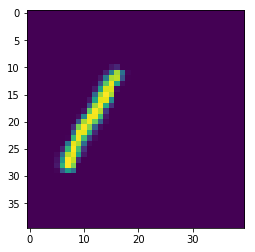

In [73]:
import scipy.io as sio
mat_contents = sio.loadmat('/mnt/c/Users/Rees/Downloads/training_and_validation_batches/training_and_validation_batches/1.mat')
nums = mat_contents['affNISTdata']
import matplotlib.pyplot as plt
print(nums[0][0][5].shape)
labels = nums[0][0][5].T
imgs = np.transpose(nums[0][0][2].reshape((40,40, 60000)), (2,0,1))
labels

index = 200
plt.imshow(imgs[index])
print(imgs[index].shape)
print(labels[index])
plt.show()

In [103]:
img_shape = (40,40)

train_images = imgs[:5000]
train_labels = labels[:5000]

test_images = imgs[5000:]
test_labels = labels[5000:]

# train_images = mnist.train_images()
# train_labels = mnist.train_labels()

# test_images = mnist.test_images()
# test_labels = mnist.test_labels()

torch_train_images = torch.from_numpy(train_images).view(-1, 1, img_shape[1],img_shape[0]).float()
torch_train_labels = torch.from_numpy(train_labels)

torch_test_images = torch.from_numpy(test_images).view(-1, 1, img_shape[1],img_shape[0]).float()
torch_test_labels = torch.from_numpy(test_labels)
print(torch_train_images.shape)
print(torch_train_labels.shape)

print(torch_test_images.shape)
print(torch_test_labels.shape)
train = torch.utils.data.TensorDataset(torch_train_images, torch_train_labels.view(-1, 1))
train_loader = torch.utils.data.DataLoader(train, batch_size=64, shuffle=False)

test = torch.utils.data.TensorDataset(torch_test_images, torch_test_labels.view(-1, 1))
test_loader = torch.utils.data.DataLoader(test, batch_size=64, shuffle=False)

torch.Size([5000, 1, 40, 40])
torch.Size([5000, 1])
torch.Size([55000, 1, 40, 40])
torch.Size([55000, 1])


In [382]:
swcnn

NameError: name 'hook' is not defined

In [331]:
# class FeatureExtractor(nn.Module):
#     def __init__(self, submodule, extracted_layers):
#         print(submodule)
#         self.submodule = submodule

#     def forward(self, x):
#         outputs = []
#         for name, module in self.submodule._modules.items():
#             x = module(x)
#             if name in self.extracted_layers:
#                 outputs += [x]
#         return outputs + [x]
outputs = []
def printnorm(self, input, output):
    pass
    

def get_output(self, input, output):
    outputs.append(output[0].data)
hooks = []
hooks.append(swcnn.layer1.register_forward_hook(get_output))
hooks.append(swcnn.shape_whitening.register_forward_hook(get_output))





OUTPUTS: []


IndexError: list index out of range

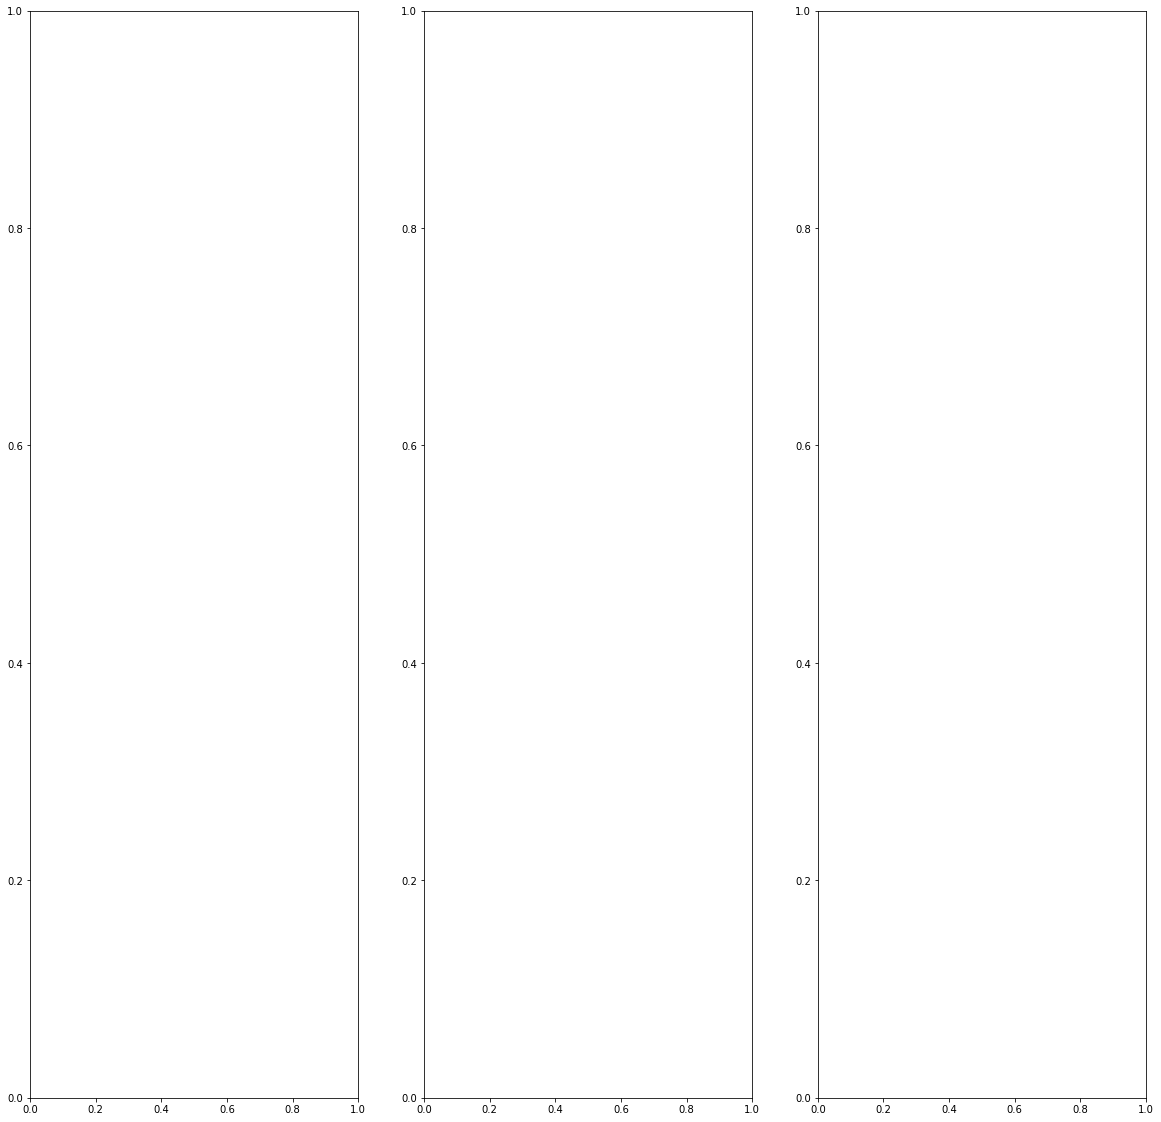

In [402]:
outputs = []
index = np.random.randint(500)
fig, ax = plt.subplots(1, 3, figsize=(20,20))
print("OUTPUTS:", outputs)
new_results = swcnn(train[index][0].view(1, 1, 40, 40))
print("OUTPUTS:", outputs[0].shape)
outputs[0] = outputs[0].view(1, 16, 40, 40)
# compress = KernelCompress(16)
print(compress(outputs[0]).shape)
ax[0].imshow(train[index][0].view(40,40).data)
ax[1].imshow(compress(outputs[0]).view(40,40).data)
ax[2].imshow(compress(outputs[1]).view(40,40).data)

In [401]:
swcnn.shape_whitening.compress

AttributeError: 'ShapeWhitening' object has no attribute 'compress'